# Fit KDE on docked DSI fragments

Notebook for fitting KDE on docked DSI fragment poses.

Lets load the best docked poses

In [1]:
import pandas as pd

df_frag_lib = pd.read_csv('../../data/DSI_lib.csv')
df_frag_lib

,ID,Formula,MW,Purity,Salt_name,Salt_ratio,MW_salt,Well,Smile,Structure,Name,500 mM solubility comment
0,Z31735562,C11H14N2O3,222.25,98.0,NaN,0,0.0,AA07,COCC(=O)NC=1C=CC=C(NC(=O)C)C1,NaN,N-(3-acetamidophenyl)-2-methoxyacetamide,NaN
1,Z1650040241,C7H14N2O,142.20,95.0,NaN,0,0.0,F07,CCC(=O)NC1CCNC1,NaN,N-(pyrrolidin-3-yl)propanamide,NaN
2,Z263785508,C6H9N3O2S,187.22,98.0,NaN,0,0.0,G07,COCC(=O)NC1=NN=C(C)S1,NaN,"2-methoxy-N-(5-methyl-1,3,4-thiadiazol-2-yl)ac...",not completely soluble at 500 mM
3,Z275181224,C12H14N4O,230.27,100.0,NaN,0,0.0,H07,CCN1C=C(CNC(=O)C=2C=CC=NC2)C=N1,NaN,N-[(1-ethyl-1H-pyrazol-4-yl)methyl]pyridine-3-...,NaN
4,Z276545932,C12H11N5O,241.25,100.0,NaN,0,0.0,I07,COC=1C=CC(NC=2N=CN=C3NC=NC23)=CC1,NaN,N-(4-methoxyphenyl)-9H-purin-6-amine,not completely soluble at 500 mM
...,...,...,...,...,...,...,...,...,...,...,...,...
763,Z19731563,C13H14N2O3,246.27,100.0,NaN,0,0.0,U41,CC1=CC(NC(=O)COC=2C=CC(C)=CC2)=NO1,NaN,"N-(5-methyl-1,2-oxazol-3-yl)-2-(4-methylphenox...",NaN
764,Z2856434834,C14H20N2O2,248.33,97.0,NaN,0,0.0,V41,CC=1C=CC=C(NC(=O)CN2CCOCC2)C1C,NaN,"N-(2,3-dimethylphenyl)-2-(morpholin-4-yl)aceta...",NaN
765,Z57282999,C8H11N3O3,197.20,100.0,NaN,0,0.0,W41,O=C1NC=C(N2CCOCC2)C(=O)N1,NaN,"5-(morpholin-4-yl)-1,2,3,4-tetrahydropyrimidin...",not completely soluble at 500 mM
766,Z31480458,C15H21NO2,247.34,100.0,NaN,0,0.0,X41,CC(C)COC=1C=CC(=CC1)C(=O)N2CCCC2,NaN,1-[4-(2-methylpropoxy)benzoyl]pyrrolidine,NaN


Generate rdkit mol object by template matching onto conformer

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdmolfiles import MolFromMol2File

n_poses = 1

mol_list = []
for index, row in df_frag_lib.iterrows():
    
    for pose in range(1, n_poses+1):
        try:
            docked_mol_file = f"results/DSI/ranked_prepared_{row['ID']}_m1_{pose}.mol2"

            docked_mol = MolFromMol2File(docked_mol_file)
            mol_from_smiles = Chem.MolFromSmiles(row['Smile'])

            with open(docked_mol_file, 'r') as mol_file:
                file_lines = mol_file.readlines()
                for line_num, line in enumerate(file_lines):
                    if 'Gold.PLP.Fitness' in line:
                        gold_score = float(file_lines[line_num+1])
                        break
            ref_mol = AllChem.AssignBondOrdersFromTemplate(mol_from_smiles, docked_mol)
            df_frag_lib.loc[index, f'mol_{pose}'] = ref_mol
            df_frag_lib.loc[index, f'score_{pose}'] = gold_score
            
            mol_list.append(ref_mol)
        except ValueError:
            print(f'Error processing molecule {row.ID}')
            continue
df_frag_lib

INFO:rdkit:Enabling RDKit 2022.03.2 jupyter extensions


Error processing molecule Z2272040604


,ID,Formula,MW,Purity,Salt_name,Salt_ratio,MW_salt,Well,Smile,Structure,Name,500 mM solubility comment,mol_1,score_1
0,Z31735562,C11H14N2O3,222.25,98.0,NaN,0,0.0,AA07,COCC(=O)NC=1C=CC=C(NC(=O)C)C1,NaN,N-(3-acetamidophenyl)-2-methoxyacetamide,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fd0f1b12d70>,46.3602
1,Z1650040241,C7H14N2O,142.20,95.0,NaN,0,0.0,F07,CCC(=O)NC1CCNC1,NaN,N-(pyrrolidin-3-yl)propanamide,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fd0f178eb30>,34.6932
2,Z263785508,C6H9N3O2S,187.22,98.0,NaN,0,0.0,G07,COCC(=O)NC1=NN=C(C)S1,NaN,"2-methoxy-N-(5-methyl-1,3,4-thiadiazol-2-yl)ac...",not completely soluble at 500 mM,<rdkit.Chem.rdchem.Mol object at 0x7fd0f190ddf0>,33.1216
3,Z275181224,C12H14N4O,230.27,100.0,NaN,0,0.0,H07,CCN1C=C(CNC(=O)C=2C=CC=NC2)C=N1,NaN,N-[(1-ethyl-1H-pyrazol-4-yl)methyl]pyridine-3-...,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fd0f1972f30>,59.2428
4,Z276545932,C12H11N5O,241.25,100.0,NaN,0,0.0,I07,COC=1C=CC(NC=2N=CN=C3NC=NC23)=CC1,NaN,N-(4-methoxyphenyl)-9H-purin-6-amine,not completely soluble at 500 mM,<rdkit.Chem.rdchem.Mol object at 0x7fd0f17c4d30>,54.5378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,Z19731563,C13H14N2O3,246.27,100.0,NaN,0,0.0,U41,CC1=CC(NC(=O)COC=2C=CC(C)=CC2)=NO1,NaN,"N-(5-methyl-1,2-oxazol-3-yl)-2-(4-methylphenox...",NaN,<rdkit.Chem.rdchem.Mol object at 0x7fd0f1bc56f0>,45.3702
764,Z2856434834,C14H20N2O2,248.33,97.0,NaN,0,0.0,V41,CC=1C=CC=C(NC(=O)CN2CCOCC2)C1C,NaN,"N-(2,3-dimethylphenyl)-2-(morpholin-4-yl)aceta...",NaN,<rdkit.Chem.rdchem.Mol object at 0x7fd0f1bc57f0>,51.5439
765,Z57282999,C8H11N3O3,197.20,100.0,NaN,0,0.0,W41,O=C1NC=C(N2CCOCC2)C(=O)N1,NaN,"5-(morpholin-4-yl)-1,2,3,4-tetrahydropyrimidin...",not completely soluble at 500 mM,<rdkit.Chem.rdchem.Mol object at 0x7fd0f1bc5730>,33.1235
766,Z31480458,C15H21NO2,247.34,100.0,NaN,0,0.0,X41,CC(C)COC=1C=CC(=CC1)C(=O)N2CCCC2,NaN,1-[4-(2-methylpropoxy)benzoyl]pyrrolidine,NaN,<rdkit.Chem.rdchem.Mol object at 0x7fd0f1bc5870>,47.4297


In [4]:
import plotly.express as px

px.histogram(df_frag_lib, x='score_1')

Generate pharmacophore dataframe

In [5]:
import numpy as np
from fresco.featurise import return_pcore_dataframe_for_list_of_mols

fragpcore_df = return_pcore_dataframe_for_list_of_mols(mol_list)
fragpcore_df

100%|██████████| 767/767 [00:05<00:00, 130.91it/s]


,pcore,smiles,mol_id,coord_x,coord_y,coord_z,weight
0,Donor,COCC(=O)Nc1cccc(NC(C)=O)c1,0,-12.082300,14.08760,68.67350,1.0
0,Donor,COCC(=O)Nc1cccc(NC(C)=O)c1,0,-13.501700,11.24860,72.39700,1.0
0,Acceptor,COCC(=O)Nc1cccc(NC(C)=O)c1,0,-11.625700,12.41150,65.40180,1.0
0,Acceptor,COCC(=O)Nc1cccc(NC(C)=O)c1,0,-12.251500,11.94580,67.88750,1.0
0,Acceptor,COCC(=O)Nc1cccc(NC(C)=O)c1,0,-12.342200,10.00510,70.87260,1.0
...,...,...,...,...,...,...,...
0,Donor,COc1ccccc1NC(=O)c1ccc(C)s1,766,-12.308700,14.66290,69.52660,1.0
0,Acceptor,COc1ccccc1NC(=O)c1ccc(C)s1,766,-13.461500,12.94450,71.30110,1.0
0,Acceptor,COc1ccccc1NC(=O)c1ccc(C)s1,766,-11.097900,16.48340,68.76050,1.0
0,Aromatic,COc1ccccc1NC(=O)c1ccc(C)s1,766,-11.721880,14.43216,65.89906,1.0


In [6]:
from fresco.featurise import return_default_pharmacophore_pairs, calculate_pairwise_distances_between_pharmacophores_for_fragment_ensemble

pcore_pairs = return_default_pharmacophore_pairs()

frag_pair_distance_dict = {}   

for pcore_pair in pcore_pairs:
    core_a,core_b = pcore_pair.split('-')
    frag_pair_distance_dict[pcore_pair] = calculate_pairwise_distances_between_pharmacophores_for_fragment_ensemble(fragpcore_df, core_a, core_b)

frag_pair_distance_dict

0     True
0     True
0    False
0    False
0    False
     ...  
0    False
0    False
0    False
0    False
0    False
Name: smiles, Length: 1090, dtype: bool
0    False
0    False
0     True
0     True
0    False
     ...  
0    False
0    False
0    False
0    False
0    False
Name: smiles, Length: 1090, dtype: bool
0    False
0    False
0    False
0    False
0     True
     ...  
0    False
0    False
0    False
0    False
0    False
Name: smiles, Length: 1090, dtype: bool
0    False
0    False
0    False
0    False
0    False
     ...  
0    False
0    False
0    False
0    False
0    False
Name: smiles, Length: 1090, dtype: bool
0    False
0    False
0    False
0    False
0    False
     ...  
0    False
0    False
0    False
0    False
0    False
Name: smiles, Length: 1090, dtype: bool
0    False
0    False
0    False
0    False
0    False
     ...  
0    False
0    False
0    False
0    False
0    False
Name: smiles, Length: 1090, dtype: bool
0    False
0    False
0    False
0

{'Donor-Aromatic': array([1.97835859, 4.01968568, 3.90244326, ..., 2.64590568, 2.56486183,
        2.34319611]),
 'Aromatic-Acceptor': array([2.24057445, 6.28817234, 4.00244718, ..., 4.33008714, 7.57384695,
        3.02109438]),
 'Aromatic-Aromatic': array([0.99154799, 6.38390655, 1.9670796 , ..., 2.46917231, 4.67851956,
        4.87934833]),
 'Donor-Donor': array([4.97117243, 7.32939025, 0.86667973, ..., 3.6343358 , 3.13381624,
        1.98157104]),
 'Donor-Acceptor': array([2.82223858, 3.81436145, 2.69432501, ..., 1.98118068, 4.81063604,
        3.18295229]),
 'Acceptor-Acceptor': array([5.05103435, 1.01937638, 3.02130759, ..., 3.01105216, 4.35577487,
        2.09413728])}

In [7]:

from fresco.model import fit_pair_kde

pair_kdes = {}

for pcore_pair in tqdm(pcore_pairs):
    core_a,core_b = pcore_pair.split('-')

    pair_data = frag_pair_distance_dict[pcore_pair]
    kde = fit_pair_kde(pair_data)
    pair_kdes[pcore_pair] = kde
    
pair_kdes

100%|██████████| 6/6 [00:01<00:00,  4.60it/s]


{'Donor-Aromatic': <scipy.interpolate.interpolate.interp1d at 0x7fcf27766530>,
 'Aromatic-Acceptor': <scipy.interpolate.interpolate.interp1d at 0x7fcf277e3cb0>,
 'Aromatic-Aromatic': <scipy.interpolate.interpolate.interp1d at 0x7fcf2772ed70>,
 'Donor-Donor': <scipy.interpolate.interpolate.interp1d at 0x7fcf2772edd0>,
 'Donor-Acceptor': <scipy.interpolate.interpolate.interp1d at 0x7fcf2750bcb0>,
 'Acceptor-Acceptor': <scipy.interpolate.interpolate.interp1d at 0x7fcf27584cb0>}

/Users/williammccorkindale/miniconda3/envs/csd_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

/Users/williammccorkindale/miniconda3/envs/csd_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

/Users/williammccorkindale/miniconda3/envs/csd_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

/Users/williammccorkindale/miniconda3/envs/csd_env/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

/Users/w

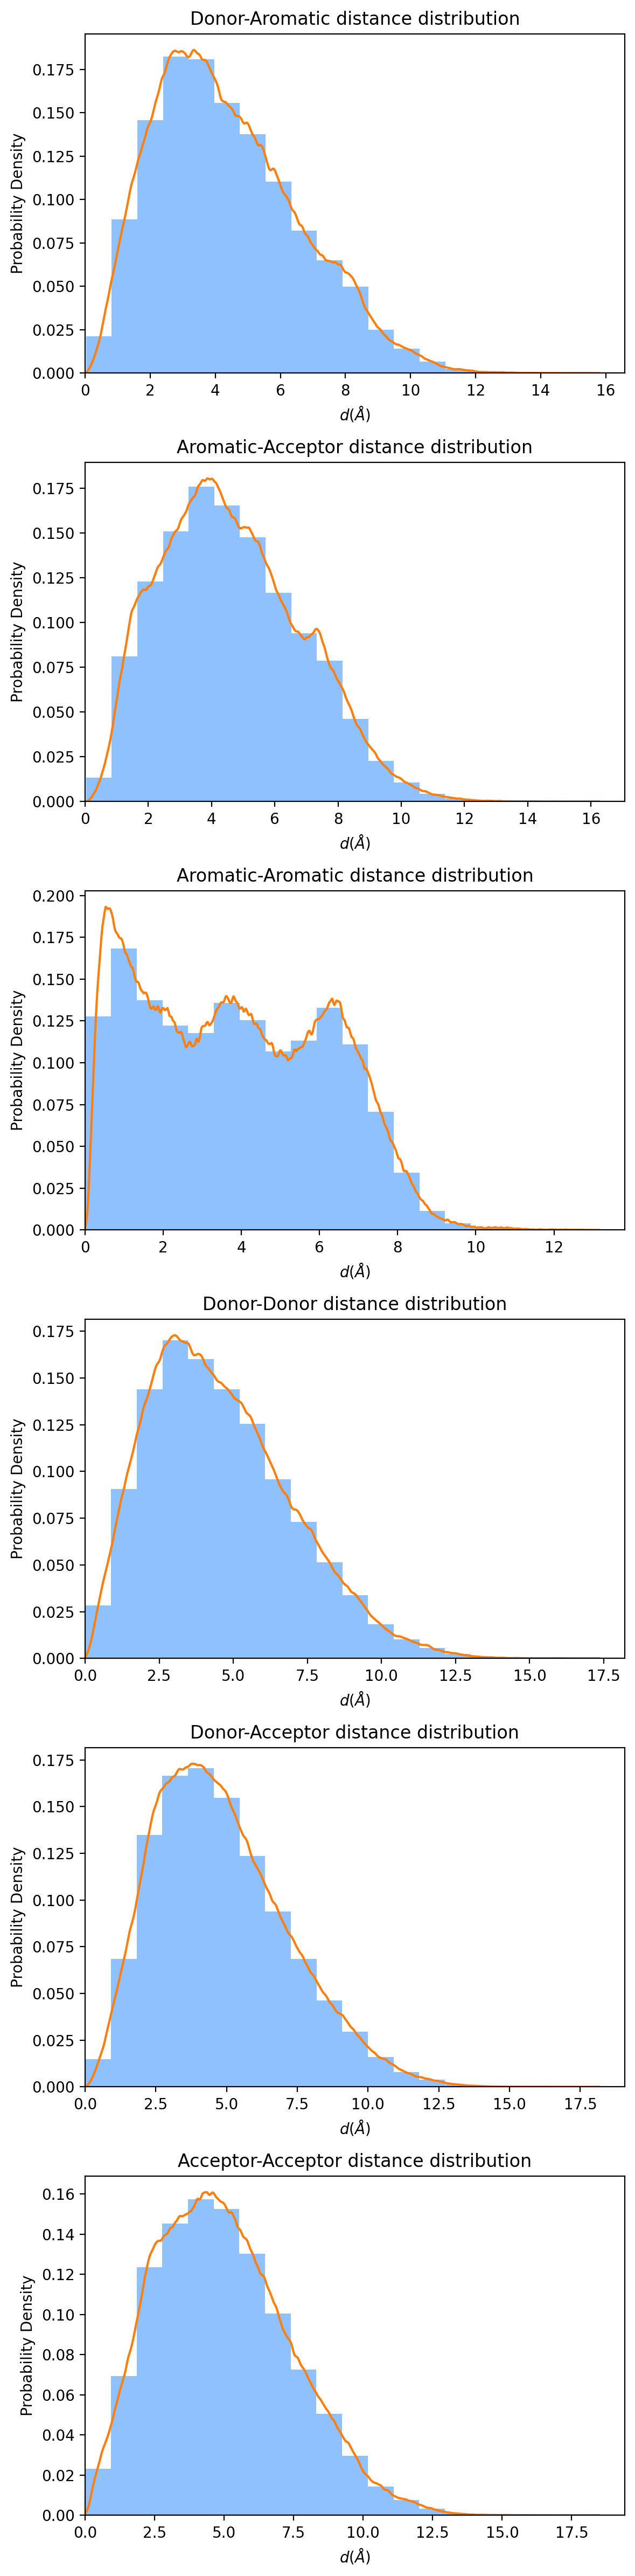

In [8]:
# import seaborn as sns
import matplotlib.pyplot as plt

nx = 500

n_bins = 20

cmap = plt.get_cmap("tab10")
# sns.set_style('white')

fig, axs = plt.subplots(nrows=6, figsize=(6, 24), dpi=200)
for i,combo in enumerate(pcore_pairs):
    x = np.linspace(0, np.amax(frag_pair_distance_dict[combo]), nx)
    kde_pair = pair_kdes[combo]
    axs[i].set_title('{} distance distribution'.format(
    combo))
    axs[i].hist(frag_pair_distance_dict[combo], bins=n_bins,
                alpha=0.5, density=True, color='#1E85FC')
    axs[i].plot(x, np.exp(kde_pair(x)), color=cmap(1))
    axs[i].set_xlim(left=0)
    axs[i].set_ylabel('Probability Density')
    axs[i].set_xlabel(r'$d (\AA)$')
    fig.tight_layout()
    fig.show()


In [9]:
from fresco.model import save_kde_model

# save_kde_model(filename='kde_on_docked_mpro_frags.pkl', kde_model=pair_kdes)
# save_kde_model(filename=f'kde_on_{n_poses}_docked_mpro_frags.pkl', kde_model=pair_kdes)
save_kde_model(filename=f'kde_on_docked_dsi_frags.pkl', kde_model=pair_kdes)
